# Tutorial - Text Mining - Classification 

We will predict the category of discussion posts in a newsgroup.

**The unit of analysis is a discussion post**

### Import common packages

In [1]:
import pandas as pd
import numpy as np

np.random_seed = 1

### Load data

In [2]:
news = pd.read_csv('news.csv')

news.shape


(597, 5)

In [3]:
news.head(5)

,TEXT,graphics,hockey,medical,newsgroup
0,I have a few reprints left of chapters from my...,1,0,0,graphics
1,"gnuplot, etc. make it easy to plot real valued...",1,0,0,graphics
2,Article-I.D.: snoopy.1pqlhnINN8k1 References: ...,1,0,0,graphics
3,"Hello, I am looking to add voice input capabil...",1,0,0,graphics
4,I recently got a file describing a library of ...,1,0,0,graphics


### Check for missing values

In [4]:
news[['TEXT']].isna().sum()

TEXT    0
dtype: int64

## Assign the input variable to X and the target variable to y

In [5]:
X = news['TEXT']

This is a multi-class classification problem. There are three categories we will predict:<br>
Whether a post is "graphics," "hockey," or "medical" related

In [6]:
y = news['newsgroup']
y.unique()

array(['graphics', 'hockey', 'medical'], dtype=object)

In [7]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(y)
print(le.classes_)
y = le.transform(y)

y

['graphics' 'hockey' 'medical']


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

# Lemmatization

In [8]:
import nltk
from nltk.stem import WordNetLemmatizer 
from nltk import pos_tag, word_tokenize

# Define the corpus of documents
corpus = X

transformed_corpus = []
wnl = WordNetLemmatizer()
for document in corpus:
    transformed_document = ""
    for word, tag in pos_tag(word_tokenize(document)):
        wntag = tag[0].lower()
        wntag = wntag if wntag in ['a', 'r', 'n', 'v'] else None
        if not wntag:
            lemma = word
        else:
            lemma = wnl.lemmatize(word, wntag)
        transformed_document+= lemma + " "
    transformed_corpus += [transformed_document]

transformed_corpus[0]


"I have a few reprint leave of chapter from my book `` Visions of the Future '' . These include reprint of 3 chapter probably of interest to reader of this forum , include : 1 . Current Techniques and Development of Computer Art , by Franz Szabo 2 . Forging a Career as a Sculptor from a Career as Computer Programmer , by Stewart Dickson 3 . Fractals and Genetics in the Future by H. Joel Jeffrey I 'd be happy to send out free reprint to researcher for scholarly purpose , until the reprint run out . Just send me your name and address . Thanks , Cliff cliff @ watson.ibm.com "

In [9]:
type(transformed_corpus)


list

In [10]:
X = pd.Series(transformed_corpus)

## Split the data

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [12]:
X_train.shape, y_train.shape

((417,), (417,))

In [13]:
X_test.shape, y_test.shape

((180,), (180,))

In [14]:
X_train.head(5)

309    ee0i+ @ andrew.cmu.edu ( `` Ethan Z. Evans '' ...
169    Hi Everyone : : I be look for some software ca...
364    In article < 1qi44l $ kqr @ access.digex.net >...
547    In article < C5JE94.KrL @ unx.sas.com > sasghm...
388    : you mention could cut it as star in the NHL ...
dtype: object

In [15]:
y_train[:5]

array([1, 0, 1, 2, 1])

## Sklearn: Text preparation

For simplicity (and focus), we will not do any text cleaning or preprocessing. We will just use the raw text as input to the model. See the text mining fundamentals tutorial for more details on text cleaning and preprocessing.

In [16]:
#TfidfVectorizer includes pre-processing, tokenization, filtering stop words
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(stop_words='english', lowercase=True, token_pattern="[^\W\d_]+")

X_train = tfidf_vect.fit_transform(X_train)

**Notice in the previous step that we use `fit_transform` on TRAIN. When we transform the TEST data, we need to use `transform` only. This enables us to keep the number of columns (features) the same across the data sets. Otherwise, they WILL be different, and no model will work!**

In [17]:
# Perform the TfidfVectorizer transformation
# Be careful: We are using the train fit to transform the test data set. Otherwise, the test data 
# features will be very different and match the train set!!!

X_test = tfidf_vect.transform(X_test)


In [18]:
X_train.shape, X_test.shape

((417, 8843), (180, 8843))

In [19]:
# These data sets are "sparse matrix". We can't see them unless we convert using toarray()
X_train

<417x8843 sparse matrix of type '<class 'numpy.float64'>'
	with 27730 stored elements in Compressed Sparse Row format>

In [20]:
# These data sets are "sparse matrix". We can't see them unless we convert using toarray()
X_train.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Latent Semantic Analysis (Singular Value Decomposition)

### SVD with n_components=100

In [21]:
from sklearn.decomposition import TruncatedSVD

svd_100 = TruncatedSVD(n_components=100, n_iter=10) #n_components is the number of topics, which should be less than the number of features

X_train_100= svd_100.fit_transform(X_train)
X_test_100 = svd_100.transform(X_test)


In [22]:
X_train_100.shape, X_test_100.shape

((417, 100), (180, 100))

### SVD with n_components=300

In [23]:
from sklearn.decomposition import TruncatedSVD

svd_300 = TruncatedSVD(n_components=300, n_iter=10) #n_components is the number of topics, which should be less than the number of features

X_train_300= svd_300.fit_transform(X_train)
X_test_300 = svd_300.transform(X_test)


In [24]:
X_train_300.shape, X_test_300.shape

((417, 300), (180, 300))

### SVD with n_components=500

In [25]:
from sklearn.decomposition import TruncatedSVD

svd_500 = TruncatedSVD(n_components=500, n_iter=10) #n_components is the number of topics, which should be less than the number of features

X_train_500= svd_500.fit_transform(X_train)
X_test_500 = svd_500.transform(X_test)


In [26]:
X_train_500.shape, X_test_500.shape

((417, 417), (180, 417))

In Singular Value Decomposition (SVD), the number of singular values (which is equal to the number of non-zero diagonal elements in the diagonal matrix S) is equal to the rank of the matrix. 
The rank of a matrix is defined as the number of linearly independent rows or columns in the matrix.

The rank of a matrix cannot exceed the number of rows or columns in the matrix. Therefore, the number of singular values (and hence the number of components in the SVD) cannot be greater than the number of rows or columns in the matrix.

Hence,though we gave the n_components = 500, since the number of rows in the X_train matrix is 417, the limit for the number of components is 417 only.

In [60]:
performance = pd.DataFrame({"model": [], "SVD_components" : [],  "Accuracy": []})

## Random Forest

RF with SVD_100

In [61]:
from sklearn.ensemble import RandomForestClassifier 

rnd_clf_100 = RandomForestClassifier(n_estimators=100, max_leaf_nodes=16, n_jobs=-1) 
_ = rnd_clf_100.fit(X_train_100, y_train)

RF with SVD_300

In [62]:
from sklearn.ensemble import RandomForestClassifier 

rnd_clf_300 = RandomForestClassifier(n_estimators=100, max_leaf_nodes=16, n_jobs=-1) 
_ = rnd_clf_300.fit(X_train_300, y_train)

RF with SVD_500

In [63]:
from sklearn.ensemble import RandomForestClassifier 

rnd_clf_500 = RandomForestClassifier(n_estimators=100, max_leaf_nodes=16, n_jobs=-1) 
_ = rnd_clf_500.fit(X_train_500, y_train)

### Evaluating Random Forest Model Performance

In [64]:
from sklearn.metrics import accuracy_score

In [65]:
#Train accuracy - Not a good measure of model performance as we are using the same data set to train and test
y_pred_100 = rnd_clf_100.predict(X_train_100)
acc = accuracy_score(y_train, y_pred_100)
print(f"Train acc_100: {accuracy_score(y_train, y_pred_100):.4f}")

Train acc_100: 0.9688


In [66]:
#Test accuracy with n = 100
y_pred_test_100 = rnd_clf_100.predict(X_test_100)
acc = accuracy_score(y_test, y_pred_test_100)
print(f"Test acc_100: {accuracy_score(y_test, y_pred_test_100):.4f}")

performance = pd.concat([performance, pd.DataFrame({'model':"Random Forest", 
                                                    'SVD_components' : 100,
                                                    'Accuracy': accuracy_score(y_test, y_pred_test_100) 
                                                   },index = [0])])
                                                    
                                                    

Test acc_100: 0.9111


In [67]:
#Train accuracy - Not a good measure of model performance as we are using the same data set to train and test
y_pred_300 = rnd_clf_300.predict(X_train_300)
acc = accuracy_score(y_train, y_pred_300)
print(f"Train acc_100: {accuracy_score(y_train, y_pred_300):.4f}")

Train acc_100: 0.9856


In [68]:
#Test accuracy with n =300
y_pred_test_300 = rnd_clf_300.predict(X_test_300)
acc = accuracy_score(y_test, y_pred_test_300)
print(f"Test acc_300: {accuracy_score(y_test, y_pred_test_300):.4f}")
performance = pd.concat([performance, pd.DataFrame({'model':"Random Forest", 
                                                    'SVD_components' : 300,
                                                    'Accuracy': accuracy_score(y_test, y_pred_test_300) 
                                                   },index = [0])])
                                                    

Test acc_300: 0.9056


In [69]:
#Train accuracy - Not a good measure of model performance as we are using the same data set to train and test
y_pred_500 = rnd_clf_500.predict(X_train_500)
acc = accuracy_score(y_train, y_pred_500)
print(f"Train acc_100: {accuracy_score(y_train, y_pred_500):.4f}")

Train acc_100: 0.9832


In [70]:
#Test accuracy with n= 500
y_pred_test_500 = rnd_clf_500.predict(X_test_500)
acc = accuracy_score(y_test, y_pred_test_500)
print(f"Test acc_300: {accuracy_score(y_test, y_pred_test_500):.4f}")
performance = pd.concat([performance, pd.DataFrame({'model':"Random Forest", 
                                                    'SVD_components' : 500,
                                                    'Accuracy': accuracy_score(y_test, y_pred_test_500) 
                                                   },index = [0])])

Test acc_300: 0.8889


In [71]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

cm_100 = confusion_matrix(y_test, y_pred_test_100)
cm_300 = confusion_matrix(y_test, y_pred_test_300)
cm_500 = confusion_matrix(y_test, y_pred_test_500)

In [72]:
cm_100

array([[46,  0,  6],
       [ 2, 64,  4],
       [ 3,  1, 54]])

In [73]:
cm_300

array([[43,  1,  8],
       [ 2, 66,  2],
       [ 3,  1, 54]])

In [74]:
cm_500

array([[43,  1,  8],
       [ 1, 64,  5],
       [ 3,  2, 53]])

## Stochastic Gradient Descent Classifier

In [75]:
from sklearn.linear_model import SGDClassifier

sgd_clf_100 = SGDClassifier(max_iter=100)
_ = sgd_clf_100.fit(X_train_100, y_train)

In [76]:
#Train accuracy - Not a good measure of model performance as we are using the same data set to train and test
y_pred_100 = sgd_clf_100.predict(X_train_100)
acc = accuracy_score(y_train, y_pred_100)
print(f"Train acc_100: {accuracy_score(y_train, y_pred_100):.4f}")

Train acc_100: 0.9880


In [77]:
#Test accuracy with n = 100
y_pred_test_100 = sgd_clf_100.predict(X_test_100)
acc = accuracy_score(y_test, y_pred_test_100)
print(f"Test acc_100: {accuracy_score(y_test, y_pred_test_100):.4f}")
performance = pd.concat([performance, pd.DataFrame({'model':"Stochastic Grad Descent Classifier", 
                                                    'SVD_components' : 100,
                                                    'Accuracy': accuracy_score(y_test, y_pred_test_100) 
                                                   },index = [0])])

Test acc_100: 0.9667


In [78]:
sgd_clf_300 = SGDClassifier(max_iter=100)
_ = sgd_clf_300.fit(X_train_300, y_train)

In [79]:
#Train accuracy - Not a good measure of model performance as we are using the same data set to train and test
y_pred_300 = sgd_clf_300.predict(X_train_300)
acc = accuracy_score(y_train, y_pred_300)
print(f"Train acc_300: {accuracy_score(y_train, y_pred_300):.4f}")

Train acc_300: 0.9976


In [80]:
#Test accuracy with n = 100
y_pred_test_300 = sgd_clf_300.predict(X_test_300)
acc = accuracy_score(y_test, y_pred_test_300)
print(f"Test acc_100: {accuracy_score(y_test, y_pred_test_300):.4f}")
performance = pd.concat([performance, pd.DataFrame({'model':"Stochastic Grad Descent Classifier", 
                                                    'SVD_components' : 300,
                                                    'Accuracy': accuracy_score(y_test, y_pred_test_300) 
                                                   },index = [0])])

Test acc_100: 0.9722


In [81]:
sgd_clf_500 = SGDClassifier(max_iter=100)
_ = sgd_clf_500.fit(X_train_500, y_train)

In [82]:
#Train accuracy - Not a good measure of model performance as we are using the same data set to train and test
y_pred_500 = sgd_clf_500.predict(X_train_500)
acc = accuracy_score(y_train, y_pred_500)
print(f"Train acc_300: {accuracy_score(y_train, y_pred_500):.4f}")

Train acc_300: 0.9976


In [83]:
#Test accuracy with n = 100
y_pred_test_500 = sgd_clf_500.predict(X_test_500)
acc = accuracy_score(y_test, y_pred_test_500)
print(f"Test acc_100: {accuracy_score(y_test, y_pred_test_500):.4f}")
performance = pd.concat([performance, pd.DataFrame({'model':"Stochastic Grad Descent Classifier", 
                                                    'SVD_components' : 500,
                                                    'Accuracy': accuracy_score(y_test, y_pred_test_500) 
                                                   },index = [0])])

Test acc_100: 0.9722


### Evaluating Stochastic Gradient Model Performance

In [84]:
cm_100 = confusion_matrix(y_test, y_pred_test_100)
cm_300 = confusion_matrix(y_test, y_pred_test_300)
cm_500 = confusion_matrix(y_test, y_pred_test_500)

In [85]:
cm_100

array([[52,  0,  0],
       [ 2, 68,  0],
       [ 3,  1, 54]])

In [86]:
cm_300

array([[51,  0,  1],
       [ 2, 68,  0],
       [ 2,  0, 56]])

In [87]:
cm_500

array([[51,  1,  0],
       [ 1, 68,  1],
       [ 2,  0, 56]])

In [88]:
performance

,model,SVD_components,Accuracy
0,Random Forest,100.0,0.911111
0,Random Forest,300.0,0.905556
0,Random Forest,500.0,0.888889
0,Stochastic Grad Descent Classifier,100.0,0.966667
0,Stochastic Grad Descent Classifier,300.0,0.972222
0,Stochastic Grad Descent Classifier,500.0,0.972222


# Summary:
    
**Observation-1: Upper Limit for the number of SVD components:**
    
(Reference- Code Line 26)
    
    
In Singular Value Decomposition (SVD), the number of singular values (which is equal to the number of non-zero diagonal elements in the diagonal matrix S) is equal to the rank of the matrix. 
The rank of a matrix is defined as the number of linearly independent rows or columns in the matrix.

The rank of a matrix cannot exceed the number of rows or columns in the matrix. Therefore, the number of singular values (and hence the number of components in the SVD) cannot be greater than the number of rows or columns in the matrix.

Hence,though we gave the n_components = 500, since the number of rows in the training set(X_train matrix) is 417, the limit for the number of components is 417 only.

**Observation-2: Increasing the number of SVD components may not improve the performance of the model**

(Reference- Code Line 88)

Clearly, for the Random forest model with SVD components- 100 has more accuracy(91.1%) than with SVD components - 300(90.5%) and 500(88.9%).
For Stochastic Gradient Descent, SVD components- 300(97.2%) is giving more accuracy than with 100(96.7%) and 500 components(97.2%).

This is because increasing the number of components beyond a certain point may result in overfitting, where the model becomes too complex and starts to memorize noise in the data, leading to worse performance on new data.

The same was illustrated in the Book- "Practical Text Mining and Statistical Analysis for Non-structured Text Data Applications" 

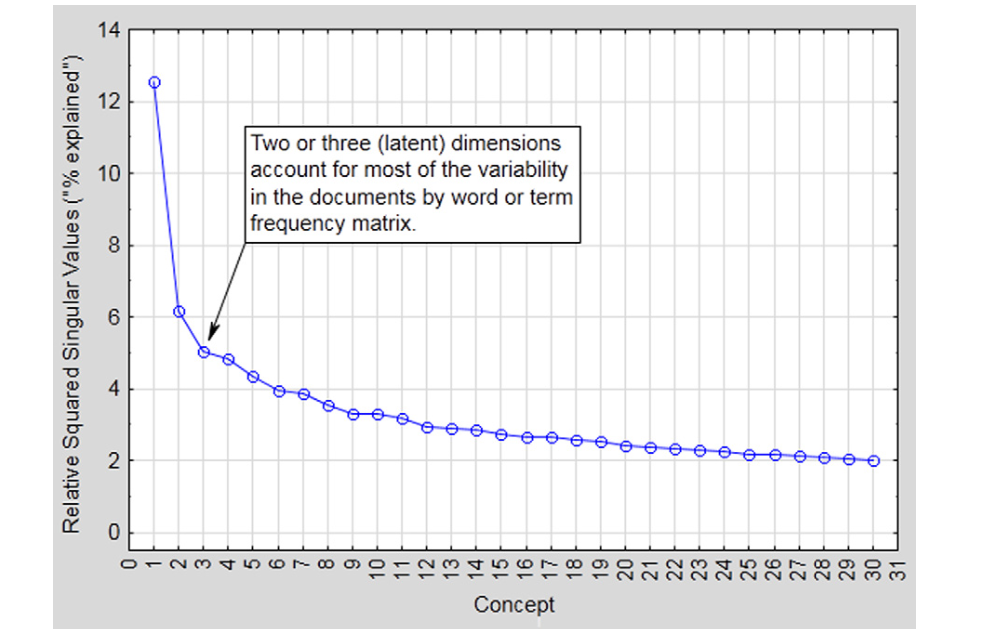


So, for this problem, SVD components = 100 is giving the best accuracy for Random Forest model and SVD components = 300 is giving the best accuracy for Stochastic Gradient Descent model.
